In [1]:
from load_functions import *
from plot_functions import *
import glob
import os
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
plt.style.use('/home/ctroupin/PycharmProjects/SOCIB_plots/stylefiles/socib.mplstyle')
cmap = plt.cm.RdYlBu_r
Nticks = 5

In [3]:
figdir = '/home/ctroupin/Projects/2-National/201606_GlidingTurtes/figures'
sstdir = '/data_local/Satellite/MODIS/data/L2/GlidingTurtle'
#gliderfile = ('http://thredds.socib.es/thredds/dodsC/auv/glider/'
#              'sdeep01-scb_sldeep001/L1/2014/'
#              'dep0017_sdeep01_scb-sldeep001_L1_2014-09-15_data_dt.nc')
sstfilelist = sorted(glob.glob(os.path.join(sstdir, '*nc')))

coordinates = [0.5, 5, 38., 40.75]

Prepare projection

In [4]:
m = Basemap(projection='merc', llcrnrlon=coordinates[0], llcrnrlat=coordinates[2],
                urcrnrlon=coordinates[1], urcrnrlat=coordinates[3],
                lat_ts=0.5 * (coordinates[2] + coordinates[3]), resolution='l')

In [12]:
def plot_field_map(m, lon, lat, field, coordinates, Nticks, figname, cmap):

    lon, lat = m(lon, lat)

    fig = plt.figure()
    ax = plt.subplot(111)
    m.ax = ax
    divider = make_axes_locatable(ax)

    cax = divider.append_axes("right", size="5%", pad=0.05)
    pcm = m.pcolormesh(lon, lat, field, vmin=23, vmax=27, cmap=cmap)

    m.drawcoastlines(linewidth=.5, zorder=3)
    m.fillcontinents(zorder=2)
    m.drawmeridians(np.linspace(coordinates[0], coordinates[1], Nticks), labels=[False,False,False,True], zorder=1)
    m.drawparallels(np.linspace(coordinates[2], coordinates[3], Nticks), labels=[True,False,False,False], zorder=1)

    cbar = plt.colorbar(pcm, extend='both', cax=cax)
    cbar.set_label('$^{\circ}$C', rotation=0, ha='left')
    plt.show()
    # plt.savefig(figname)
    plt.close()


/data_local/Satellite/MODIS/data/L2/GlidingTurtle/A2016195131500.L2_LAC_SST.nc



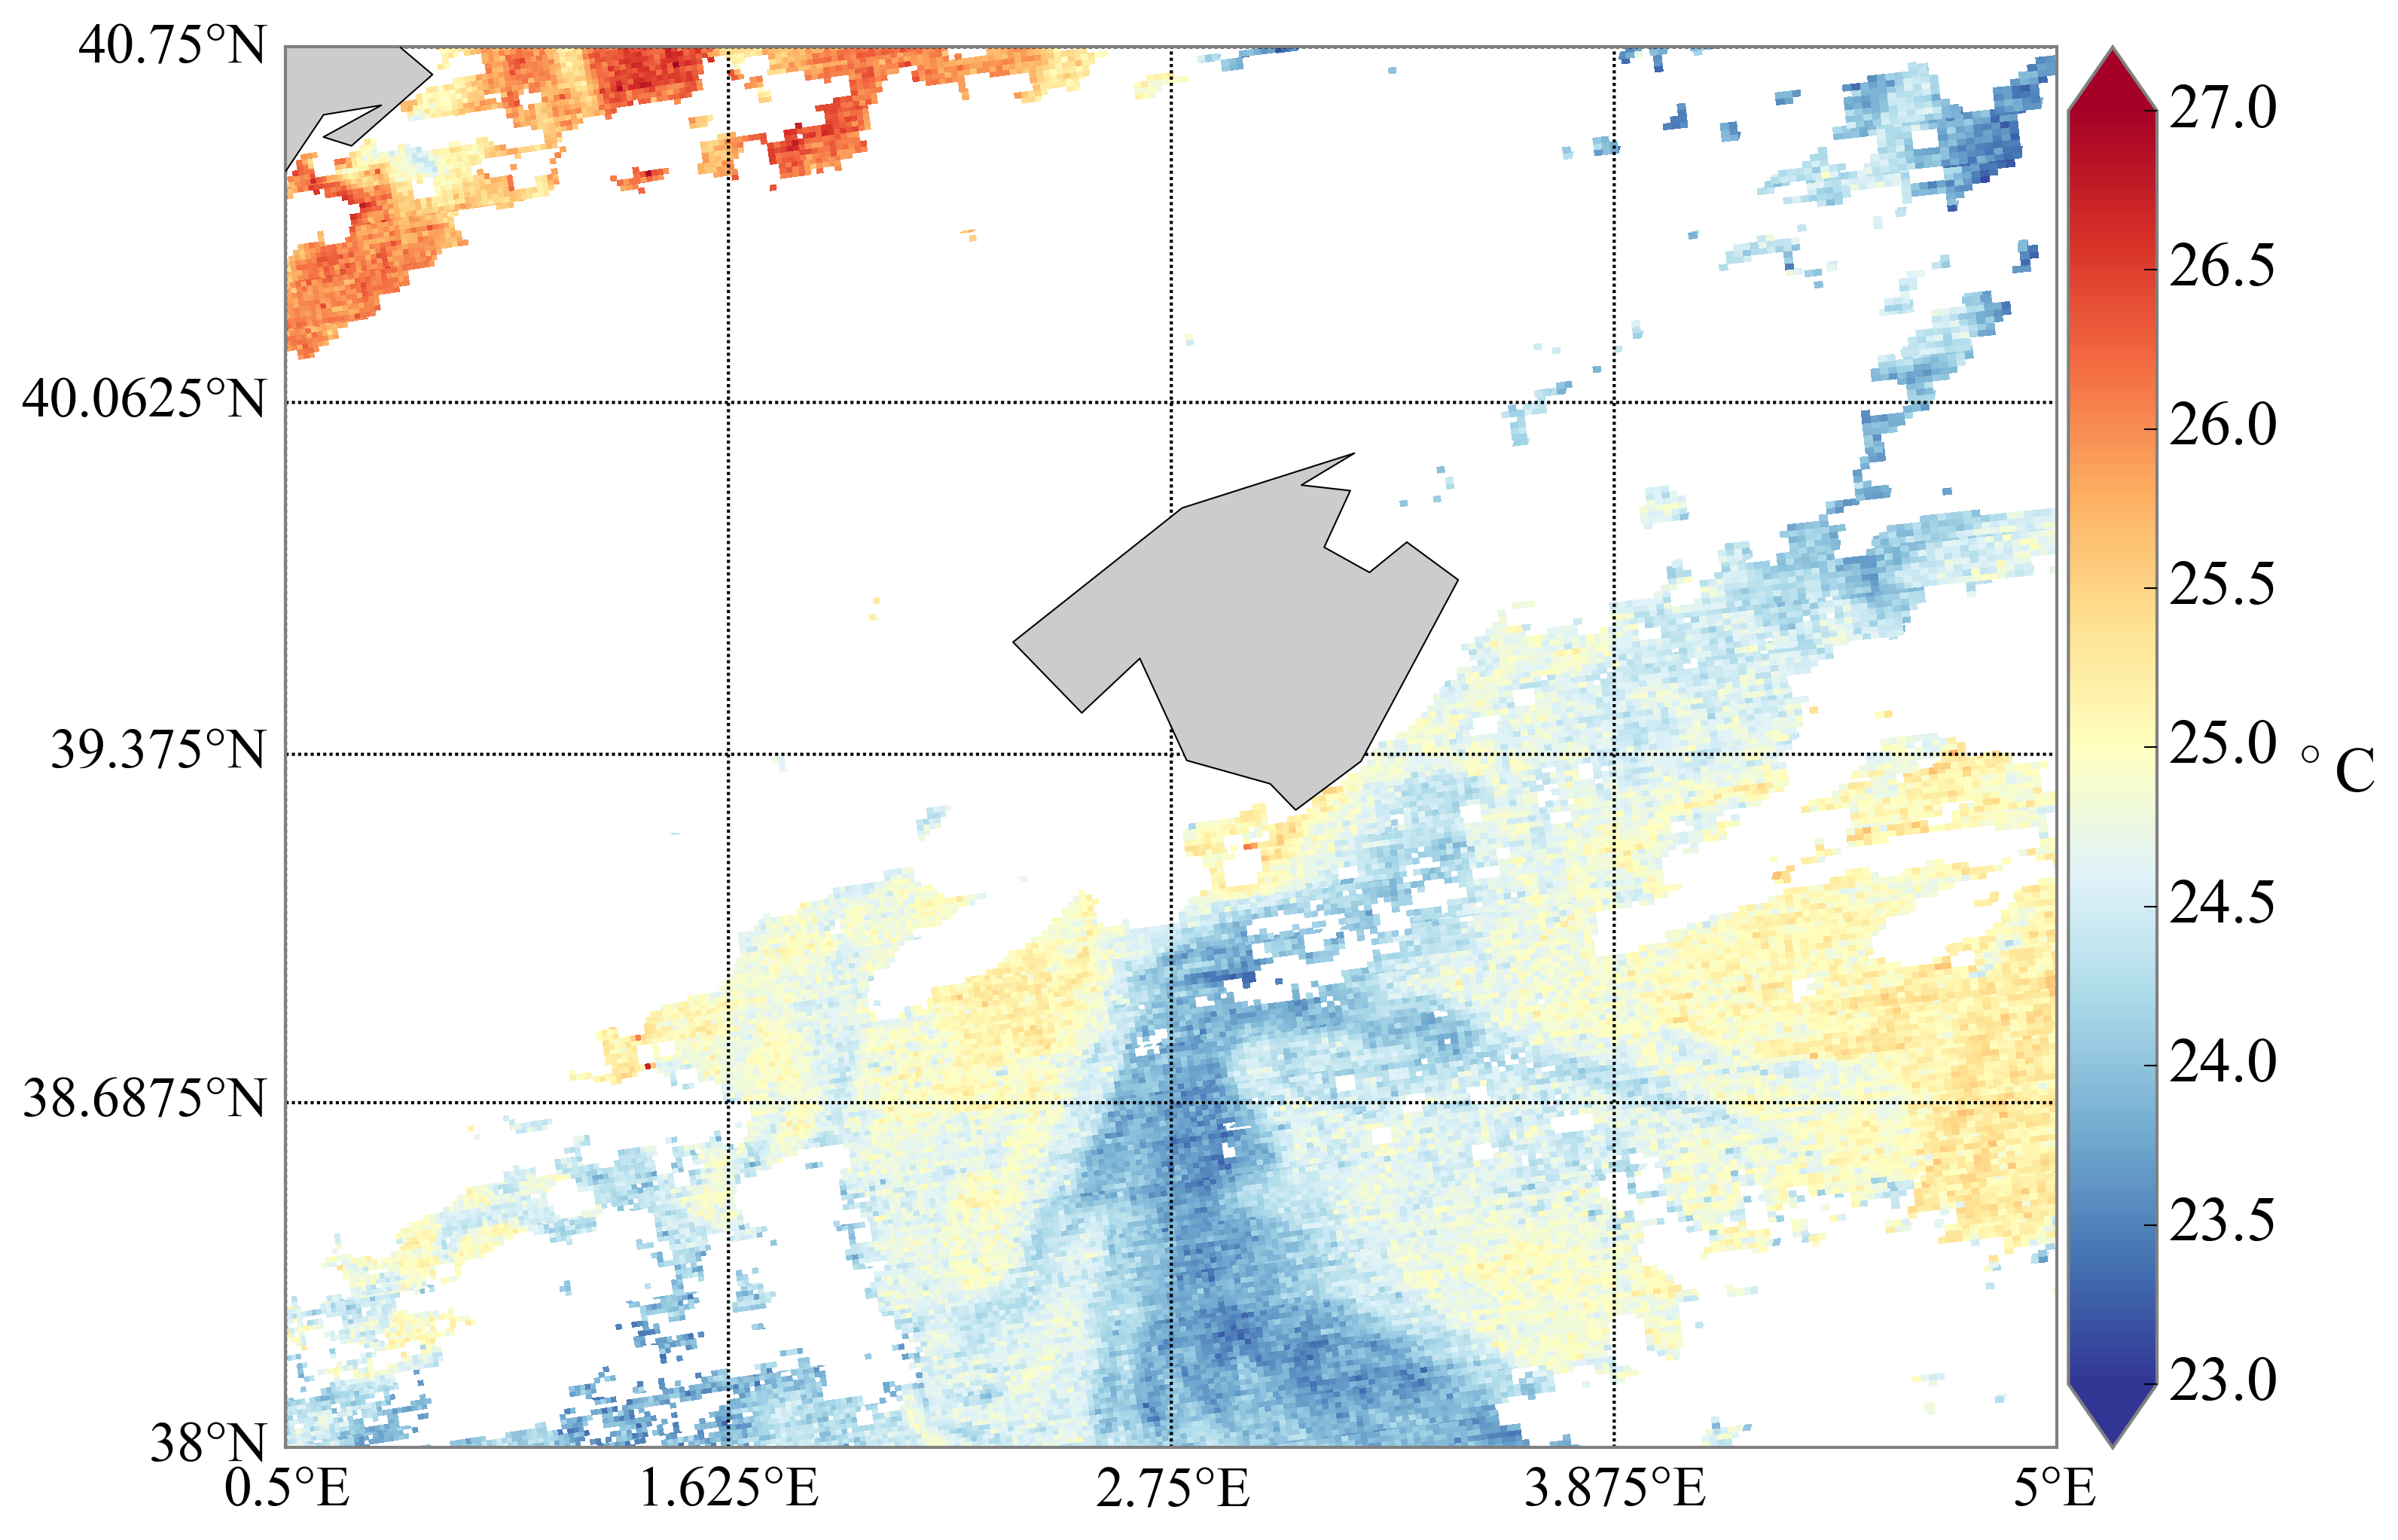

In [13]:
for sstfiles in sstfilelist[0:1]:
    print(sstfiles + '\n')
    
    lon, lat, sst = load_sst_modis(sstfiles)
    
    figname = os.path.basename(sstfiles)[:-3].replace('.', '_')
    figname = os.path.join(figdir, figname)
    
    plot_field_map(m, lon, lat, sst, coordinates, Nticks, figname, cmap)